<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/Collab---v-3.8/notebooks/T2%20-%202%20-%20Data%20Cleaning%20-%20Funciones%20de%20distribuci%C3%B3n%20de%20probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
a = 1
b = 100
n = 10000000
data = np.random.uniform(a, b, n)

(array([ 998701., 1001182.,  999174., 1000218., 1000611., 1001673.,
         998624.,  999883., 1001099.,  998835.]),
 array([ 1.00002233, 10.90001936, 20.80001638, 30.70001341, 40.60001044,
        50.50000747, 60.4000045 , 70.30000152, 80.19999855, 90.09999558,
        99.99999261]),
 <BarContainer object of 10 artists>)

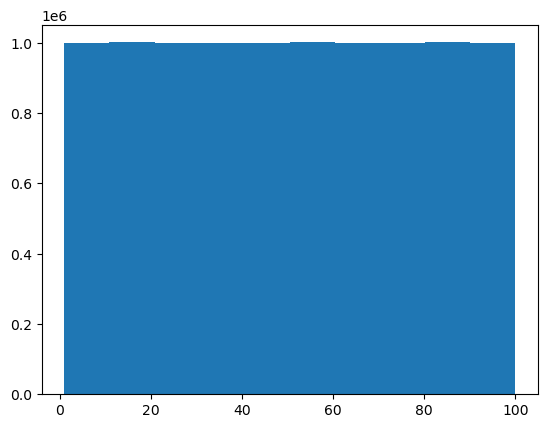

In [9]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [17]:
data = np.random.randn(10000)

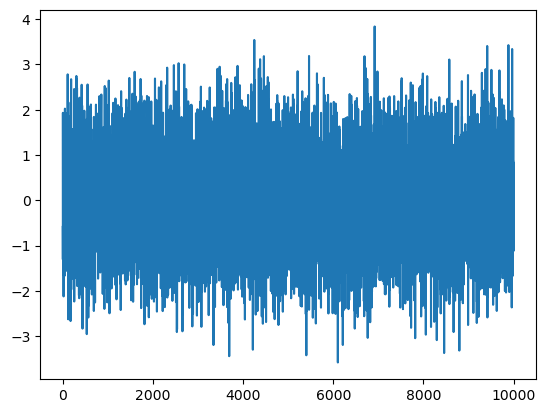

In [19]:
x = range(1,10001)
plt.plot(x, data)

(array([  17.,  148.,  703., 1836., 2791., 2637., 1322.,  457.,   79.,
          10.]),
 array([-3.57825795, -2.83657218, -2.0948864 , -1.35320063, -0.61151486,
         0.13017092,  0.87185669,  1.61354246,  2.35522824,  3.09691401,
         3.83859978]),
 <BarContainer object of 10 artists>)

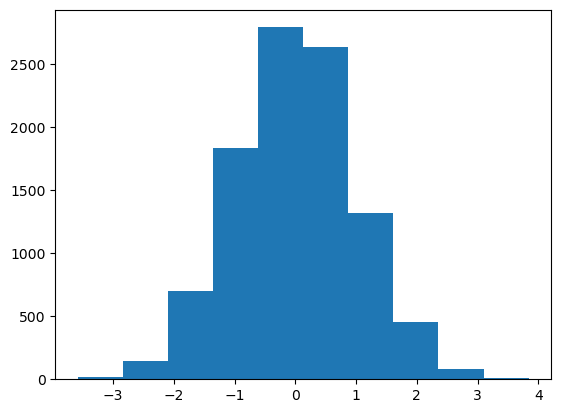

In [20]:
%matplotlib inline
plt.hist(data)

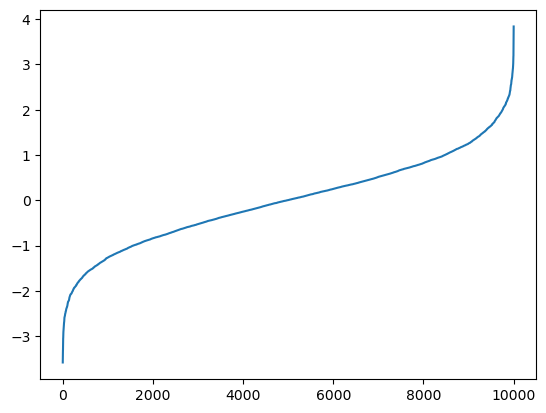

In [21]:
plt.plot(x,sorted(data))#ordena los numeros , forma de distribucion acumulada , sirve para comprobar que si tiene distribucioon normal

(array([3.400e+01, 2.190e+02, 1.007e+03, 2.374e+03, 3.091e+03, 2.139e+03,
        9.050e+02, 2.040e+02, 2.600e+01, 1.000e+00]),
 array([-3.34393487, -1.35231631,  0.63930226,  2.63092082,  4.62253939,
         6.61415795,  8.60577652, 10.59739508, 12.58901365, 14.58063221,
        16.57225078]),
 <BarContainer object of 10 artists>)

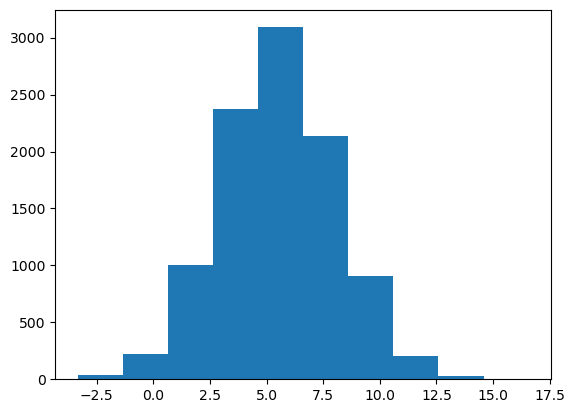

In [22]:
mu = 5.5 #media
sd = 2.5 #desviacion standar
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z (tipifica)
plt.hist(data)

In [10]:
data = np.random.randn(2,4)
data

array([[ 0.00239305,  0.66424699, -0.46608439, -2.06345436],
       [ 0.10321101,  0.10132709, -0.70695038, -0.87042236]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [ ]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0 #valor inciial
    pi_value_list = [] #par ir rellenadndo
    for i in range(n_exp):#para calcular experimento varias veces
        value = 0
        x = np.random.uniform(0,1,n).tolist() #aleatorio entre o,1 y se convierte a lista
        y = np.random.uniform(0,1,n).tolist() #
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])#como son listas se tiene que accesder mediante posiciones[j]
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.143076000000002


(3.143076000000002, [<matplotlib.lines.Line2D at 0x7f85134a1ac8>])

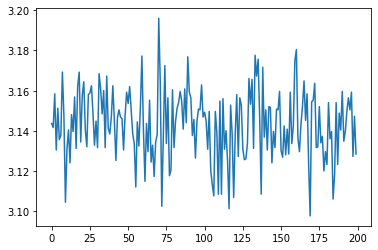

In [12]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [23]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [24]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000400,1.495197,18.500504
std,0.998224,2.500994,7.794387
min,-4.513329,-11.065997,5.000082
25%,-0.673857,-0.191246,11.752210
50%,-0.000306,1.495156,18.489818
75%,0.675521,3.183104,25.257611
max,4.817072,12.902414,31.999990


(array([1.69000e+02, 3.79500e+03, 3.89970e+04, 1.74080e+05, 3.42938e+05,
        3.01112e+05, 1.17417e+05, 1.99950e+04, 1.43400e+03, 6.30000e+01]),
 array([-4.51332943, -3.58028926, -2.6472491 , -1.71420893, -0.78116876,
         0.1518714 ,  1.08491157,  2.01795174,  2.9509919 ,  3.88403207,
         4.81707224]),
 <BarContainer object of 10 artists>)

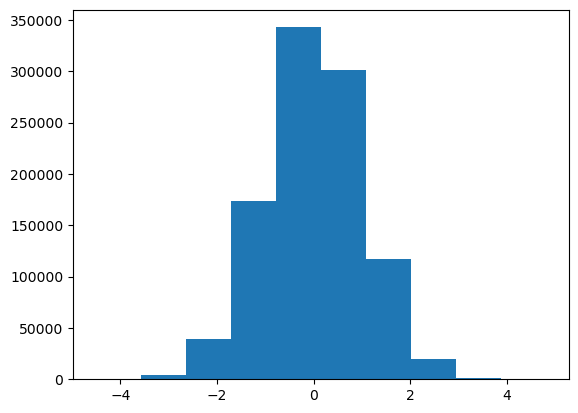

In [25]:
plt.hist(data["A"])

(array([2.70000e+01, 9.50000e+02, 1.49470e+04, 1.01160e+05, 2.91350e+05,
        3.58181e+05, 1.87491e+05, 4.18580e+04, 3.88500e+03, 1.51000e+02]),
 array([-11.06599674,  -8.66915565,  -6.27231455,  -3.87547346,
         -1.47863237,   0.91820873,   3.31504982,   5.71189091,
          8.10873201,  10.5055731 ,  12.90241419]),
 <BarContainer object of 10 artists>)

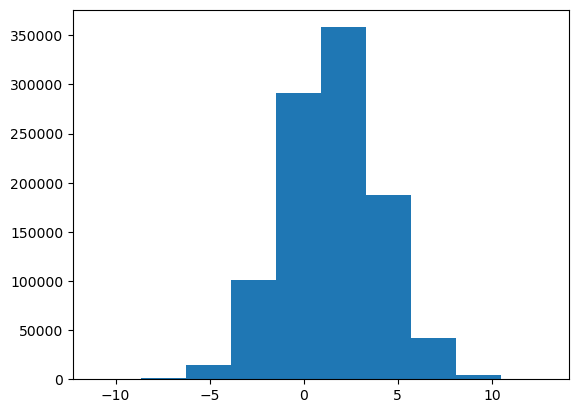

In [26]:
plt.hist(data["B"])

(array([ 99605., 100182., 100171., 100072., 100360., 100155.,  99538.,
         99547., 100169., 100201.]),
 array([ 5.00008209,  7.70007284, 10.40006359, 13.10005435, 15.8000451 ,
        18.50003585, 21.2000266 , 23.90001735, 26.6000081 , 29.29999885,
        31.9999896 ]),
 <BarContainer object of 10 artists>)

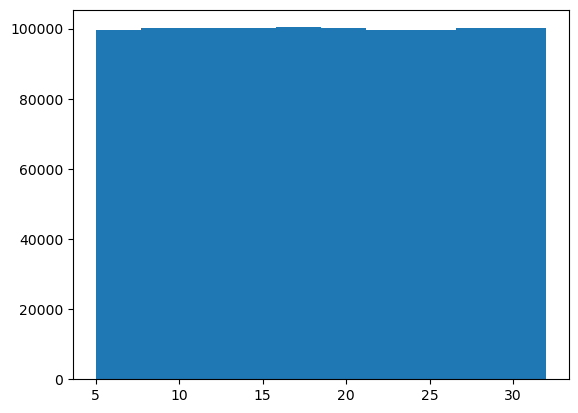

In [27]:
plt.hist(data["C"])

In [30]:
#data = pd.read_csv("/content/drive/My Drive/Curso Machine Learning con Python/datasets/customer-churn-model/Customer Churn Model.txt")
mainpath="/home/juan/Documentos/DATA SCIENCE/python-ml-course-master/datasets/"
filename="customer-churn-model/Customer Churn Model.txt"
fullpath=os.path.join(mainpath, filename)
data=pd.read_csv(fullpath)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [31]:
colum_names = data.columns.values.tolist()

In [21]:
a = len(colum_names)
a

21

In [ ]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [23]:
new_data

,Column Name,A,B
42,State,0.009601,0.571675
43,Account Length,1.127091,0.203394
44,Area Code,1.413309,0.426407
45,Phone,1.335081,0.190180
46,Int'l Plan,-0.828382,0.156801
47,VMail Plan,0.608314,0.255236
48,VMail Message,-1.529998,0.688072
49,Day Mins,0.463638,0.638551
50,Day Calls,-0.419050,0.900912
51,Day Charge,0.180764,0.204704
